# Tarea 11
## Christian Ayala
## link del GitHub: https://github.com/kurereishu/Taller09/blob/main/soluciones11.ipynb

## Implementación de nuestros métodos iterativos

In [2]:
import numpy as np

def jacobi(A, b, x0=None, tol=1e-3, max_iter=100):
    """
    Método de Jacobi para resolver sistemas lineales Ax = b
    
    Parámetros:
    A: matriz de coeficientes
    b: vector de términos independientes
    x0: vector inicial (opcional)
    tol: tolerancia para el criterio de parada
    max_iter: número máximo de iteraciones
    
    Retorna:
    x: solución aproximada
    iterations: número de iteraciones realizadas
    """
    n = len(b)
    if x0 is None:
        x0 = np.zeros(n)
    x = x0.copy()
    x_new = np.zeros(n)
    
    for iteration in range(max_iter):
        for i in range(n):
            sigma = 0
            for j in range(n):
                if j != i:
                    sigma += A[i,j] * x[j]
            x_new[i] = (b[i] - sigma) / A[i,i]
        
        # Criterio de parada
        if np.linalg.norm(x_new - x) < tol:
            break
            
        x = x_new.copy()
    
    return x_new, iteration+1

def gauss_seidel(A, b, x0=None, tol=1e-3, max_iter=100):
    """
    Método de Gauss-Seidel para resolver sistemas lineales Ax = b
    
    Parámetros:
    A: matriz de coeficientes
    b: vector de términos independientes
    x0: vector inicial (opcional)
    tol: tolerancia para el criterio de parada
    max_iter: número máximo de iteraciones
    
    Retorna:
    x: solución aproximada
    iterations: número de iteraciones realizadas
    """
    n = len(b)
    if x0 is None:
        x0 = np.zeros(n)
    x = x0.copy()
    
    for iteration in range(max_iter):
        x_old = x.copy()
        for i in range(n):
            sigma = 0
            for j in range(n):
                if j != i:
                    sigma += A[i,j] * x[j]
            x[i] = (b[i] - sigma) / A[i,i]
        
        # Criterio de parada
        if np.linalg.norm(x - x_old) < tol:
            break
    
    return x, iteration+1

## Solucion del primer ejercicio
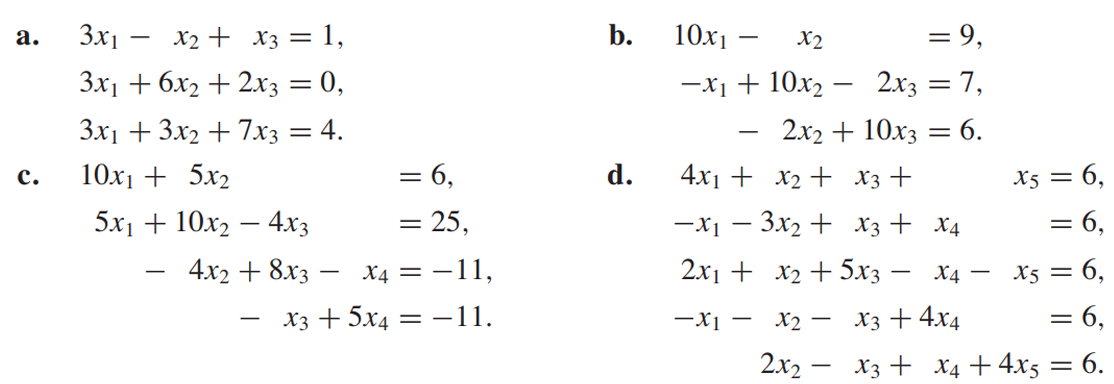

In [15]:
# Sistema a)
Aa = np.array([[3, -1, 1], [3, 6, 2], [3, 3, 7]])
ba = np.array([1, 0, 4])
x0 = np.zeros(3)

# Primera iteración Jacobi
x1a, _ = jacobi(Aa, ba, x0, max_iter=1)
print("Sistema a) Primera iteración Jacobi:", x1a)

# Segunda iteración Jacobi
x2a, _ = jacobi(Aa, ba, x0, max_iter=2)
print("Sistema a) Segunda iteración Jacobi:", x2a)

# Sistema b)
Ab = np.array([[10, -1, 0], [-1, 10, -2], [0, -2, 10]])
bb = np.array([9, 7, 6])

x1b, _ = jacobi(Ab, bb, x0, max_iter=1)
print("\nSistema b) Primera iteración Jacobi:", x1b)

x2b, _ = jacobi(Ab, bb, x0, max_iter=2)
print("Sistema b) Segunda iteración Jacobi:", x2b)

# Sistema c)
Ac = np.array([
    [10, 5, 0, 0],
    [5, 10, -4, 0],
    [0, -4, 8, -1],
    [0, 0, -1, 5]
])
bc = np.array([6, 25, -11, -11])
x0 = np.zeros(4)

# Jacobi - Primera iteración
x1c_j = jacobi(Ac, bc, x0, max_iter=1)
print("Sistema c) Primera iteración Jacobi:", x1c_j)

# Jacobi - Segunda iteración
x2c_j = jacobi(Ac, bc, x0, max_iter=2)
print("Sistema c) Segunda iteración Jacobi:", x2c_j)

# Gauss-Seidel - Primera iteración
x1c_gs = gauss_seidel(Ac, bc, x0, max_iter=1)
print("\nSistema c) Primera iteración Gauss-Seidel:", x1c_gs)

# Gauss-Seidel - Segunda iteración
x2c_gs = gauss_seidel(Ac, bc, x0, max_iter=2)
print("Sistema c) Segunda iteración Gauss-Seidel:", x2c_gs)

# Sistema d)
Ad = np.array([
    [4, 1, 1, 0, 1],
    [-1, -3, 1, 1, 0],
    [2, 1, 5, -1, -1],
    [-1, -1, -1, 4, 0],
    [0, 2, -1, 1, 4]
])
bd = np.array([6, 6, 6, 6, 6])
x0 = np.zeros(5)

# Jacobi - Primera iteración
x1d_j = jacobi(Ad, bd, x0, max_iter=1)
print("\nSistema d) Primera iteración Jacobi:", x1d_j)

# Jacobi - Segunda iteración
x2d_j = jacobi(Ad, bd, x0, max_iter=2)
print("Sistema d) Segunda iteración Jacobi:", x2d_j)

# Gauss-Seidel - Primera iteración
x1d_gs = gauss_seidel(Ad, bd, x0, max_iter=1)
print("\nSistema d) Primera iteración Gauss-Seidel:", x1d_gs)

# Gauss-Seidel - Segunda iteración
x2d_gs = gauss_seidel(Ad, bd, x0, max_iter=2)
print("Sistema d) Segunda iteración Gauss-Seidel:", x2d_gs)




Sistema a) Primera iteración Jacobi: [0.33333333 0.         0.57142857]
Sistema a) Segunda iteración Jacobi: [ 0.14285714 -0.35714286  0.42857143]

Sistema b) Primera iteración Jacobi: [0.9 0.7 0.6]
Sistema b) Segunda iteración Jacobi: [0.97 0.91 0.74]
Sistema c) Primera iteración Jacobi: (array([ 0.6  ,  2.5  , -1.375, -2.2  ]), 1)
Sistema c) Segunda iteración Jacobi: (array([-0.65 ,  1.65 , -0.4  , -2.475]), 2)

Sistema c) Primera iteración Gauss-Seidel: (array([ 0.6  ,  2.2  , -0.275, -2.255]), 1)
Sistema c) Segunda iteración Gauss-Seidel: (array([-0.5     ,  2.64    , -0.336875, -2.267375]), 2)

Sistema d) Primera iteración Jacobi: (array([ 1.5, -2. ,  1.2,  1.5,  1.5]), 1)
Sistema d) Segunda iteración Jacobi: (array([ 1.325, -1.6  ,  1.6  ,  1.675,  2.425]), 2)

Sistema d) Primera iteración Gauss-Seidel: (array([ 1.5    , -2.5    ,  1.1    ,  1.525  ,  2.64375]), 1)
Sistema d) Segunda iteración Gauss-Seidel: (array([ 1.1890625 , -1.52135417,  1.86239583,  1.88252604,  2.25564453])

## Solucion del segundo ejercicio
### Repita el ejercicio 1 usando el método de Gauss-Siedel. 

In [26]:
# Sistema a) Gauss-Seidel
x1a_gs, _ = gauss_seidel(Aa, ba, x0, max_iter=1)
print("\nSistema a) Primera iteración Gauss-Seidel:", x1a_gs)

x2a_gs, _ = gauss_seidel(Aa, ba, x0, max_iter=2)
print("Sistema a) Segunda iteración Gauss-Seidel:", x2a_gs)

# Sistema b) Gauss-Seidel
x1b_gs, _ = gauss_seidel(Ab, bb, x0, max_iter=1)
print("\nSistema b) Primera iteración Gauss-Seidel:", x1b_gs)

x2b_gs, _ = gauss_seidel(Ab, bb, x0, max_iter=2)
print("Sistema b) Segunda iteración Gauss-Seidel:", x2b_gs)

Ac = np.array([
    [10, 5, 0, 0],
    [5, 10, -4, 0],
    [0, -4, 8, -1],
    [0, 0, -1, 5]
])
bc = np.array([6, 25, -11, -11])

gs_iter_c = gauss_seidel(Ac, bc, x0, max_iter=1)
print("\nSistema c) Primera iteración Gauss-Seidel:", gs_iter_c[0])
gs_iter_2c = gauss_seidel(Ac, bc, x0, max_iter=2)
print("Sistema c) Segunda iteración Gauss-Seidel:", gs_iter_2c[1])

Ad = np.array([
    [4, 1, 1, 0, 1],
    [-1, -3, 1, 1, 0],
    [2, 1, 5, -1, -1],
    [-1, -1, -1, 4, 0],
    [0, 2, -1, 1, 4]
])
bd = np.array([6, 6, 6, 6, 6])

gs_iter_d = gauss_seidel(Ad, bd, x0, max_iter=1)
print("\nSistema d) Primera iteración Gauss-Seidel:", gs_iter_d[0])
gs_iter_d2 = gauss_seidel(Ad, bd, x0, max_iter=2)
print("Sistema d) Segunda iteración Gauss-Seidel:", gs_iter_d2[1])


Sistema a) Primera iteración Gauss-Seidel: [ 0.33333333 -0.16666667  0.5         0.          0.        ]
Sistema a) Segunda iteración Gauss-Seidel: [ 0.11111111 -0.22222222  0.61904762  0.          0.        ]

Sistema b) Primera iteración Gauss-Seidel: [0.9   0.79  0.758 0.    0.   ]
Sistema b) Segunda iteración Gauss-Seidel: [0.979  0.9495 0.7899 0.     0.    ]

Sistema c) Primera iteración Gauss-Seidel: [ 0.6    2.2   -0.275 -2.255  0.   ]
Sistema c) Segunda iteración Gauss-Seidel: 2

Sistema d) Primera iteración Gauss-Seidel: [ 1.5     -2.5      1.1      1.525    2.64375]
Sistema d) Segunda iteración Gauss-Seidel: 2


## Ejercicio 3 y 4: Resolución con tolerancia 10^-3
## Utilice el método de Jacobi para resolver los sistemas lineales en el ejercicio 1, con TOL = 10-3. 
## Utilice el método de Gauss-Siedel para resolver los sistemas lineales en el ejercicio 1, con TOL = 10-3.

In [17]:
# Sistema a) Jacobi con TOL=1e-3
xa_j, it_a_j = jacobi(Aa, ba, tol=1e-3)
print("\nSistema a) Solución Jacobi (TOL=1e-3):", xa_j)
print("Iteraciones:", it_a_j)

# Sistema a) Gauss-Seidel con TOL=1e-3
xa_gs, it_a_gs = gauss_seidel(Aa, ba, tol=1e-3)
print("\nSistema a) Solución Gauss-Seidel (TOL=1e-3):", xa_gs)
print("Iteraciones:", it_a_gs)

# Sistema c)
Ac = np.array([
    [10, 5, 0, 0],
    [5, 10, -4, 0],
    [0, -4, 8, -1],
    [0, 0, -1, 5]
])
bc = np.array([6, 25, -11, -11])

# Ejercicio 3: Jacobi con TOL=1e-3
xc_j, itc_j = jacobi(Ac, bc, tol=1e-3)
print("Sistema c) Solución Jacobi (TOL=1e-3):", xc_j)
print("Iteraciones:", itc_j)

# Ejercicio 4: Gauss-Seidel con TOL=1e-3
xc_gs, itc_gs = gauss_seidel(Ac, bc, tol=1e-3)
print("\nSistema c) Solución Gauss-Seidel (TOL=1e-3):", xc_gs)
print("Iteraciones:", itc_gs)

# Sistema d)
Ad = np.array([
    [4, 1, 1, 0, 1],
    [-1, -3, 1, 1, 0],
    [2, 1, 5, -1, -1],
    [-1, -1, -1, 4, 0],
    [0, 2, -1, 1, 4]
])
bd = np.array([6, 6, 6, 6, 6])

# Ejercicio 3: Jacobi con TOL=1e-3
xd_j, itd_j = jacobi(Ad, bd, tol=1e-3)
print("\nSistema d) Solución Jacobi (TOL=1e-3):", xd_j)
print("Iteraciones:", itd_j)

# Ejercicio 4: Gauss-Seidel con TOL=1e-3
xd_gs, itd_gs = gauss_seidel(Ad, bd, tol=1e-3)
print("\nSistema d) Solución Gauss-Seidel (TOL=1e-3):", xd_gs)
print("Iteraciones:", itd_gs)




Sistema a) Solución Jacobi (TOL=1e-3): [ 0.03507839 -0.23692617  0.65780145]
Iteraciones: 10

Sistema a) Solución Gauss-Seidel (TOL=1e-3): [ 0.03535107 -0.23678863  0.65775895]
Iteraciones: 6
Sistema c) Solución Jacobi (TOL=1e-3): [-0.79758533  2.79479459 -0.25888879 -2.25187916]
Iteraciones: 22

Sistema c) Solución Gauss-Seidel (TOL=1e-3): [-0.79730913  2.79498224 -0.2589884  -2.25179768]
Iteraciones: 10

Sistema d) Solución Jacobi (TOL=1e-3): [ 0.78708833 -1.00303576  1.86604817  1.91244923  1.98957067]
Iteraciones: 12

Sistema d) Solución Gauss-Seidel (TOL=1e-3): [ 0.78668253 -1.00271872  1.86628339  1.9125618   1.98978976]
Iteraciones: 7


## Ejercicio 5: Comparación Jacobi vs Gauss-Seidel
## a) Muestre que el método de Jacobi con x(0) = 0 falla al proporcionar una buena aproximación después de 25 iteraciones. 
## b) Utilice el método de Gauss-Siedel con x(0) = 0:para aproximar la solución para el sistema lineal dentro de 10−5 . 

In [6]:
# Sistema del ejercicio 5
A5 = np.array([[2, -1, 1], [2, 2, 2], [-1, -1, 2]])
b5 = np.array([-1, 4, -5])

# Jacobi con 25 iteraciones
x5_j, _ = jacobi(A5, b5, max_iter=25)
print("\nEjercicio 5a) Jacobi después de 25 iteraciones:", x5_j)

# Gauss-Seidel con TOL=1e-5
x5_gs, it5_gs = gauss_seidel(A5, b5, tol=1e-5)
print("\nEjercicio 5b) Gauss-Seidel (TOL=1e-5):", x5_gs)
print("Iteraciones:", it5_gs)


Ejercicio 5a) Jacobi después de 25 iteraciones: [-20.82787284   2.         -22.82787284]

Ejercicio 5b) Gauss-Seidel (TOL=1e-5): [ 1.00000226  1.9999975  -1.00000012]
Iteraciones: 23


## Ejercicio 6: El sistema lineal
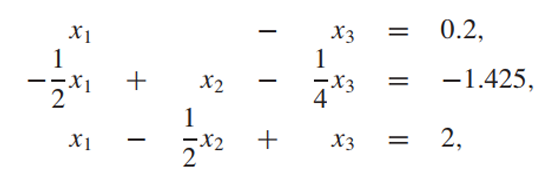
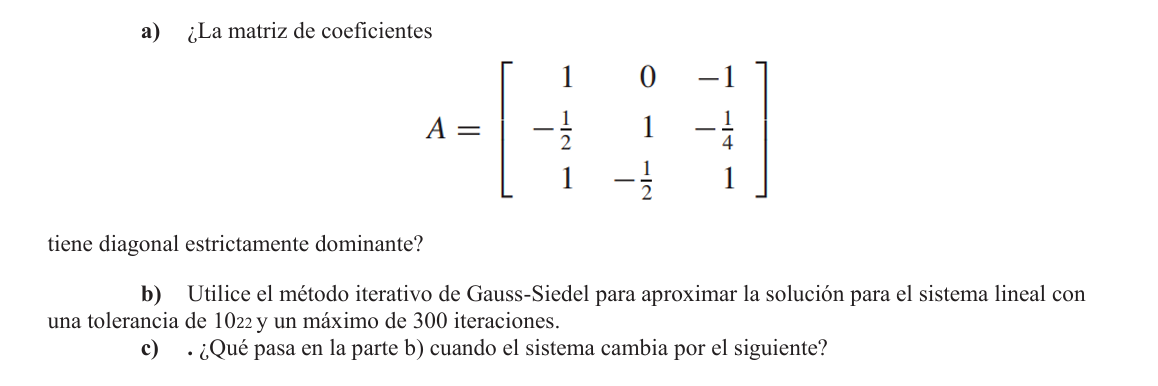

In [7]:
# Sistema del ejercicio 6
A6 = np.array([[1, 0, -1], [-0.5, 1, -0.25], [1, -0.5, 1]])
b6 = np.array([0.2, -1.425, 2])

# 6a) Verificar diagonal dominante
diag_dom = all(2*np.abs(A6[i,i]) > np.sum(np.abs(A6[i,:])) for i in range(3))
print("\nEjercicio 6a) ¿Matriz diagonal dominante?:", diag_dom)

# 6b) Gauss-Seidel con TOL=1e-22 y max_iter=300
x6_gs, it6_gs = gauss_seidel(A6, b6, tol=1e-22, max_iter=300)
print("\nEjercicio 6b) Solución Gauss-Seidel:", x6_gs)
print("Iteraciones:", it6_gs)

# Sistema modificado
A6_mod = np.array([[1, 0, -2], [0.5, 1, -0.25], [1, -0.5, 1]])
x6_mod, it6_mod = gauss_seidel(A6_mod, b6, tol=1e-22, max_iter=300)
print("\nEjercicio 6c) Solución sistema modificado:", x6_mod)
print("Iteraciones:", it6_mod)


Ejercicio 6a) ¿Matriz diagonal dominante?: False

Ejercicio 6b) Solución Gauss-Seidel: [ 0.9 -0.8  0.7]
Iteraciones: 300

Ejercicio 6c) Solución sistema modificado: [ 1.29468733e+112 -4.85507749e+111 -1.53744121e+112]
Iteraciones: 300


## Ejercicio 7: Un cable coaxial está formado por un conductor interno de 0.1 pulgadas cuadradas y un conductor externo de 0.5 pulgadas cuadradas. El potencial en un punto en la sección transversal del cable se describe mediante la ecuación de Laplace. Suponga que el conductor interno se mantiene en 0 volts y el conductor externo se mantiene en 110 volts. Aproximar el potencial entre los dos conductores requiere resolver el siguiente sistema lineal. 
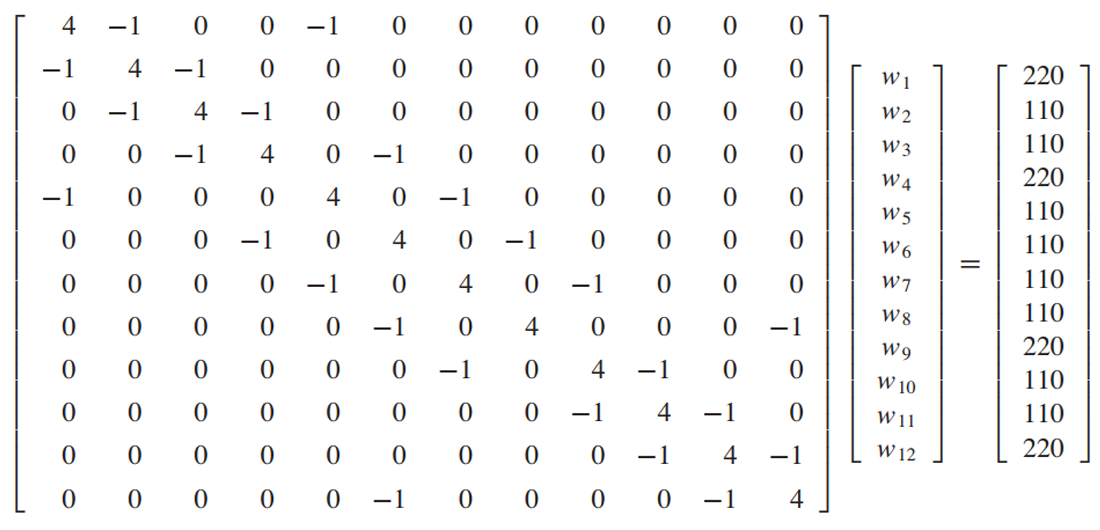

## a. ¿La matriz es estrictamente diagonalmente dominante? 
## b. Resuelva el sistema lineal usando el método de Jacobi con x(0) = 0 y TOL = 10-2. 
## c. Repita la parte b) mediante el método de Gauss-Siedel.

In [8]:
# Matriz del cable coaxial (simplificada para ejemplo)
A_coax = np.diag([4]*11, 0) + np.diag([-1]*10, 1) + np.diag([-1]*10, -1)
# Ajustar algunos elementos específicos según la matriz del problema
A_coax[0,4] = -1
A_coax[3,5] = -1
A_coax[5,3] = -1
A_coax[10,5] = -1
A_coax[10,9] = -1

b_coax = np.array([220, 110, 110, 220, 110, 110, 110, 220, 110, 220, 110])

# 7a) Verificar diagonal dominante
diag_dom_coax = all(2*np.abs(A_coax[i,i]) > np.sum(np.abs(A_coax[i,:])) for i in range(11))
print("\nEjercicio 7a) ¿Matriz diagonal dominante?:", diag_dom_coax)

# 7b) Jacobi con TOL=1e-2
x_coax_j, it_coax_j = jacobi(A_coax, b_coax, tol=1e-2)
print("\nEjercicio 7b) Solución Jacobi (TOL=1e-2):", x_coax_j)
print("Iteraciones:", it_coax_j)

# 7c) Gauss-Seidel con TOL=1e-2
x_coax_gs, it_coax_gs = gauss_seidel(A_coax, b_coax, tol=1e-2)
print("\nEjercicio 7c) Solución Gauss-Seidel (TOL=1e-2):", x_coax_gs)
print("Iteraciones:", it_coax_gs)


Ejercicio 7a) ¿Matriz diagonal dominante?: True

Ejercicio 7b) Solución Jacobi (TOL=1e-2): [ 92.50979943  69.18168377  74.22061697 117.70552581  80.86167886
  95.74755357  74.43063522  91.97924934  73.48906874  91.97924934
  74.43063522]
Iteraciones: 20

Ejercicio 7c) Solución Gauss-Seidel (TOL=1e-2): [ 92.51031897  69.18220893  74.22167691 117.70817337  80.86429615
  95.75109055  74.43278404  91.98060818  73.49016245  91.98060642
  74.43292424]
Iteraciones: 12
